# Udacity Nanodegree Program, Data Analyst

# Project 6: Inferential Statistics

# Stroop Experiment



## Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example  <span style="color:red">RED</span>, <span style="color:blue">BLUE</span>. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <span style="color:blue">PURPLE</span>, <span style="color:red">ORANGE</span>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

## 1. Dependent variable and Independent variable

As we have two groups of observations (conditions), the congruent words condition group (group1) and the incongruent words condition group (group2), both groups of same size and consists of identical subjects, it could be said that samples are dependent.

The dependent variable is time spent by reading within a condition group and the independent variable is condition group (group1 or group2).

## 2. Set of hypotheses and chosen statistical test 

My hypothesis is that brain is able to process faster the congruent words condition group task opposite to incongruent condition group task, as the evaluation of congruent words is possibly easier for the brain. In other words, I expect that congruent words condition took in average less time to complete than under the incongruent words condition. 
So null hypothesis is that the average time needed to proceed the congruent condition is equal to average time needed to proceed the incongruent condition. Alternative hypothesis is that average time needed to finish the congruent condition is smaller compared to incongruent words condition. To rewrite this hypothesis into mathematical/statistical expressions: <br>

$ H_0: \overline{x}_{group1} = \overline{x}_{group2} $ <br>

$ H_1: \overline{x}_{group1} < \overline{x}_{group2} $ <br>

Where $ \overline{x}_{group1} $ denotes average time of finishing congruent words condition task and 
$ \overline{x}_{group2} $ denotes average time of finishing incongruent words condition task.

According to this case - dependent samples (participants took test under both conditions), I assume that elements of dataset are random selection of population, observations and its differences are normally distributed and I am not aware of the populaton parameters thus **I expect to perform paired (one tailed) t-test**. 
Alpha level was chosen as $ \alpha = 0.05 $.

## 3. Descriptive statistics

In [38]:
import pandas as pd
import numpy as np

data = pd.read_csv("C:\Users\mrecl\Desktop\Inferential_Statistics\project\P6_Inferential_Statistics\P6_stroopdata.csv")

data["Difference"] = data["Congruent"] - data["Incongruent"]

avg_cong = np.average(data["Congruent"])
avg_incong = np.average(data["Incongruent"])
avg_diff = np.average(data["Difference"])
print("average of group1: ")
print(round(avg_cong, 2))
print("average of group2: ")
print(round(avg_incong, 2))
print("average of difference: ")
print(round(avg_diff, 2))

median_cong = np.median(data["Congruent"])
median_incong = np.median(data["Incongruent"])
median_diff = np.median(data["Difference"])
print("median of group1: ")
print(round(median_cong, 2))
print("median of group2: ")
print(round(median_incong, 2))
print("median of difference: ")
print(round(median_diff, 2))

var_cong = np.var(data["Congruent"], ddof=1)
var_incong = np.var(data["Incongruent"], ddof=1)
var_diff = np.var(data["Difference"], ddof=1)
print("variance of group1: ")
print(round(var_cong, 2))
print("variance of group2: ")
print(round(var_incong, 2))
print("variance of difference: ")
print(round(var_diff, 2))

sd_cong = np.sqrt(var_cong)
sd_incong = np.sqrt(var_incong)
sd_diff = np.sqrt(var_diff)
print("standard deviation of group1: ")
print(round(sd_cong, 2))
print("standard deviation of group2: ")
print(round(sd_incong, 2))
print("standard deviation of difference: ")
print(round(sd_diff, 2))

n = len(data)
dof = n - 1
print("degrees of freedom: ")
print(dof)

average of group1: 
14.05
average of group2: 
22.02
average of difference: 
-7.96
median of group1: 
14.36
median of group2: 
21.02
median of difference: 
-7.67
variance of group1: 
12.67
variance of group2: 
23.01
variance of difference: 
23.67
standard deviation of group1: 
3.56
standard deviation of group2: 
4.8
standard deviation of difference: 
4.86
degrees of freedom: 
23


## 4. Visualized distributions

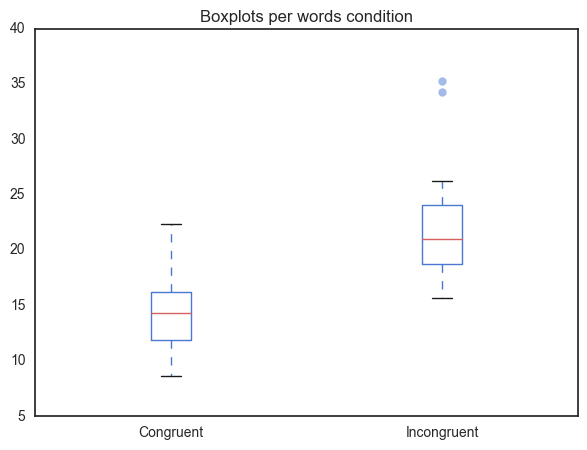

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.use("agg")
%matplotlib inline 

fig = plt.figure(1, figsize=(7, 5))
data_plt = [data["Congruent"], data["Incongruent"]]
ax = fig.add_subplot(111)
bp = ax.boxplot(data_plt)
ax.set_xticklabels(["Congruent", "Incongruent"])

for flier in bp["fliers"]:
    flier.set(marker="o", color = "#e7298a", alpha = 0.5)
plt.title("Boxplots per words condition")

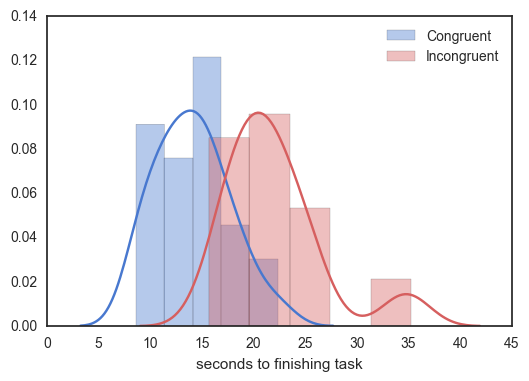

In [41]:
sns.set(style="white", palette="muted", color_codes=True)
p1 = sns.distplot(data["Congruent"], color="b", bins=5, label="Congruent", axlabel="")
p2 = sns.distplot(data["Incongruent"], color="r", bins=5, label="Incongruent", axlabel="seconds to finishing task")
plt.legend()

From above plots is clear that incongruent distribution is shifted to right, which means that finishing incongruent words condition task took in average more time opposite to completion under congruent words condition within our sample.

## 5. Statistical test and report of results

Executed one-sample t test with: <br>
one tailed critical value = - 1.714, <br>
negative direction of test <br>
chosen level of alpha as $ \alpha = 0.05 $ and <br>
degree of freedom = 23.


In [39]:
t_stat = (avg_diff/(sd_diff/np.sqrt(n)))
print("t-statistics: ")
print(t_stat)

t-statistics: 
-8.02070694411


APA style notation: <br>
t(23) = -8.02, p <.0001 , one-tailed

### Conclusion

After calculating t-statistics I can compare it to the critical value (t value lies in critical area), I come to a conclusion that it is statistically significant, thus I can reject the $ H_0 $ and do not reject the $ H_1 $. So, based on this sample it really seems that congruent words condition is less time consuming and easier for people to finish as I expected. 

## 6. More about Stroop effect

From my point of view, I believe that processing of congruent words condition is more complicated because of it requires more brain operations to execute when evaluating the task. In congruent words condition you are aware of that colour of font and meaning of word has same value (meaning) and thus you do less checking and validations of your decision what colour is used, but when you evaluating incongruent words condition it is more complicated as you have to evaluate something what has different associated meaning (Red (word) is written by blue colour), then your brain need to execute more checking and validation operations of your decision and thus it takes more time. But after some reading I also like the theory of automaticity which suggests that since recognizing colors is not an "automatic process" there is hesitancy to respond; whereas, the brain automatically understands the meaning of words as a result of habitual reading. This idea is based on the premise that automatic reading does not need controlled attention, but still uses enough attentional resources to reduce the amount of attention accessible for color information processing.

As I have already read the wiki article, I know there are other variation of Stroop test such as the one using numbers where a digit can be presented as big or small (e.g., 5 vs. 5), irrespective of its numerical value. Comparing digits in incongruent trials (e.g., 3 5, where for 3 is used bigger font) is slower than comparing digits in congruent trials (e.g., 5 3, where for 5 is used bigger font) and the difference in reaction time is termed the numerical Stroop effect.

Resources:<br>
1) https://stackoverflow.com/questions/29067541/rmarkdown-how-to-change-the-font-color <br>
2) https://en.wikipedia.org/wiki/Stroop_effect <br>
3) http://seaborn.pydata.org/index.html <br>
4) http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/ <br>
5) http://www.psychology.emory.edu/clinical/bliwise/Tutorials/TOM/meanstests/assump.htm <br>
6) http://support.minitab.com/en-us/minitab/17/topic-library/basic-statistics-and-graphs/hypothesis-tests/tests-of-means/why-use-paired-t/



Created by: <br>
Martin Rypar <br>
30.9.2017